In [1]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

Primero defino el mapeo de Hénon:

In [2]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Algoritmo para calcular áreas

In [4]:
Henon(0, 0, 1.4, 0.3)

(1.0,0.0)

In [5]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i])[1]
        CI[2, i] = f(t_range[i])[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [6]:
σ(t) = cos(t), sin(t)

σ (generic function with 1 method)

In [7]:
G(t) = (1 - 1.4*cos(t)^2 + sin(t), cos(t))

G (generic function with 1 method)

In [110]:
t_rango = 0:0.01:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853

In [9]:
t_rango = 0:0.01:2π
CI2 = condiones_iniciales_2D(G, t_rango)

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995


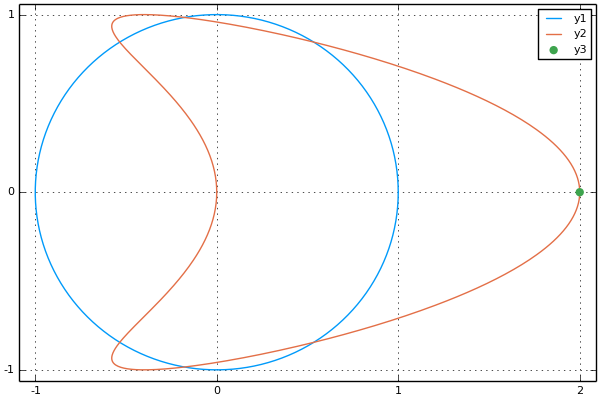

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [10]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])
#scatter!(rand(1)*4 -2, rand(1)*2 -1, leg=false)
scatter!(G(π/2))

In [11]:
function iterator_paso(f::Function, X0, a, b)

    orbit = similar(X0)
        
    for i in 1:length(aux[1, :])

        orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
        orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

    end
        
    [aux[1,:] = orbit[1,:] for i in 1:length(orbit[1,:])]
    [aux[2,:]=orbit[2,:] for i in 1:length(orbit[2,:])]

    
    orbit
    
end 

iterator_paso (generic function with 1 method)

In [28]:
function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator (generic function with 1 method)

In [29]:
t_rango = 0:0.001:2π
CI1 = condiones_iniciales_2D(σ, t_rango)

2×6284 Array{Float64,2}:
 1.0  1.0    0.999998  0.999996  0.999992    …   0.999999     1.0        
 0.0  0.001  0.002     0.003     0.00399999     -0.00118531  -0.000185307

In [30]:
CI1

2×6284 Array{Float64,2}:
 1.0  1.0    0.999998  0.999996  0.999992    …   0.999999     1.0        
 0.0  0.001  0.002     0.003     0.00399999     -0.00118531  -0.000185307

In [35]:
I3 = iterator(Henon, CI1, 1.4, 0.3, 2)

2×6284 Array{Float64,2}:
  1.076   1.07712   1.07824    1.07936   …   1.07355    1.07467    1.07579 
 -0.12   -0.1197   -0.119398  -0.119096     -0.120654  -0.120355  -0.120056


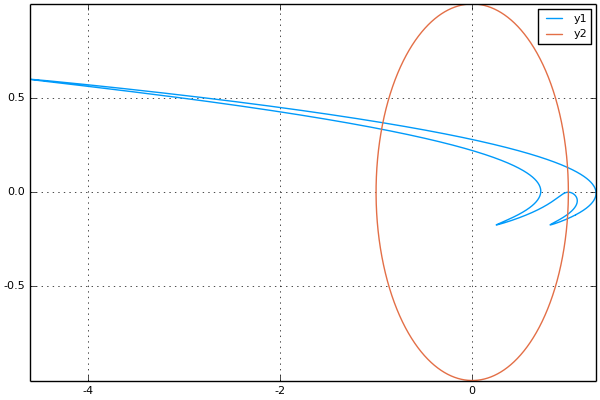

In [32]:
plot(I3[1,:], I3[2,:])
plot!(CI1[1,:], CI1[2,:])

In [17]:
CI1

2×6284 Array{Float64,2}:
 1.0  1.0    0.999998  0.999996  0.999992    …   0.999999     1.0        
 0.0  0.001  0.002     0.003     0.00399999     -0.00118531  -0.000185307

In [18]:
(max(CI1[2,:]...) - min(CI1[2,:]...)) * (max(CI1[1,:]...) - min(CI1[1,:]...))

3.9999996412804

In [19]:
max(CI1[2,:]...)

0.9999999792586128

In [20]:
function ξ(t) #parametrización cuadrado.
    t <= 2 && return (t-1, 1)
    t > 2 && t <= 4 && return (1, 3 - t)
    t > 4 && t <= 6 && return (5 - t , -1)
    t > 6 && return (-1, 7 - t)
end

ξ (generic function with 1 method)


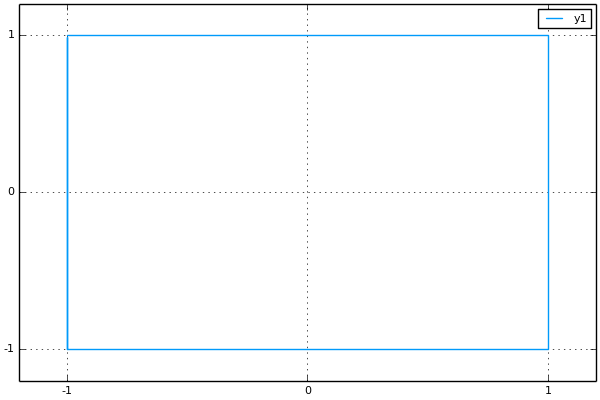

In [21]:
t2_rango = 0:0.01:8
CC1 = condiones_iniciales_2D(ξ, t2_rango)
plot(CC1[1, :], CC1[2, :], xlims=(-1.2, 1.2), ylims=(-1.2, 1.2))

## Primer método (Henon inverso)

In [33]:
function Henon_inv(x, y, a, b)
    
    y/b , x + a*(y/b)^2 -1
    
end 

Henon_inv (generic function with 1 method)

In [36]:
CI2

2×629 Array{Float64,2}:
 -0.4  -0.38986  -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  1.0   0.99995   0.9998     0.99955       0.999731   0.999913   0.999995

In [37]:
CInv1 = iterator(Henon_inv, CI2, 1.4, 1, 1)

2×629 Array{Float64,2}:
 1.0  0.99995     0.9998     0.99955    …   0.999731    0.999913    0.999995 
 0.0  0.00999983  0.0199987  0.0299955     -0.0231832  -0.0131849  -0.0031853


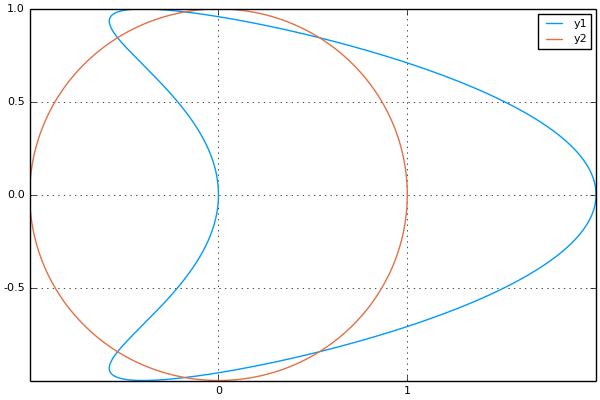

In [54]:
plot(CI2[1, :], CI2[2, :])
plot!(CInv1[1, :], CInv1[2, :])

In [52]:
(2 - min(CI2[1,:]...) ) * 2

5.157132862700387

In [39]:
function random_interval(n, range)
    
    i = range[1]
    f = range[end]
    
    rand(n)*abs(f - i) + i
    
end 

random_interval (generic function with 1 method)

In [66]:
function area_henon(N, a, b, n)
    
    dentro = 0
    total = 0
    
    condIn = condiones_iniciales_2D(σ, 0:0.001:2π)
    CH = iterator(Henon, condIn, a, b, n)
    
    x_min = min(CH[1,:]...)
    x_max = max(CH[1,:]...)
    y_min = min(CH[2,:]...) 
    y_max = max(CH[2,:]...)
    
    for i in 1:N
        
        x = random_interval(1, x_min:x_max)[1]
        y = random_interval(1, y_min:y_max)[1]
        
        for i in 1:n
        
            x_n, y_n = Henon_inv(x, y, a, b)
            x, y = x_n, y_n
            
        end
        
        r = sqrt(x^2 + y^2)
        
        if r < 1 
            
            dentro += 1
            
        end
        
        total += 1
    end

    area = (x_max - x_min)*(y_max - y_min)
    area * (dentro/total)
    #dentro/total
end

area_henon (generic function with 1 method)

In [67]:
area_henon(1000000, 1.4, 1, 1)

3.502989032530461

In [60]:
area_henon(1000000, 1.4, 1,  2)

189862

## Método Inside or Outside


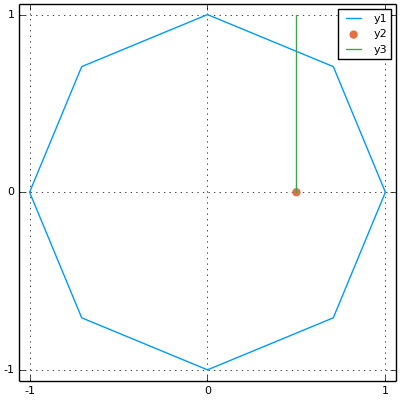

In [22]:
t_range = 0:2π/8:2π
plot(σ(t_range), size=(400, 400))
scatter!((0.5, 0.0))
plot!([(0.5, i) for i in 0:1])

In [68]:
function in_or_out(σ, range, x, y)
    
    crossings = 0
    
    for i in 1:length(range)-1
        
        if x < σ(range[i])[1] && x < σ(range[i+1])[1] || x > σ(range[i])[1] && x > σ(range[i+1])[1]
            
            nothing
            
        elseif y > σ(range[i])[2] && y > σ(range[i+1])[2]
            
            nothing
    
        elseif y < σ(range[i])[2] && y < σ(range[i+1])[2] 
            
            if x < σ(range[i])[1] && x > σ(range[i+1])[1] || x > σ(range[i])[1] && x < σ(range[i+1])[1]
                
                crossings += 1
                
            end
            
        elseif y > σ(range[i])[2] && y < σ(range[i+1])[2] 
            
            if x > σ(range[i])[1] && x < σ(range[i+1])[1]
                
                y_c = σ(range[i])[2] + (σ(range[i + 1])[2] - σ(range[i])[2])*(x - σ(range[i])[1])/(σ(range[i+1])[1] - σ(range[i])[1])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < σ(range[i])[2] && y > σ(range[i+1])[2] 

            if x <σ(range[i])[1] && x > σ(range[i+1])[1]

                y_c = σ(range[i+1])[2] + (σ(range[i])[2] - σ(range[i + 1])[2])*(x - σ(range[i+1])[1])/(σ(range[i])[1] - σ(range[i+1])[1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out (generic function with 1 method)

In [69]:
t_rango

0.0:0.001:6.283

In [70]:
in_or_out(σ, t_rango, -0.9999, 0)

true

In [71]:
function find_area(σ::Function, t_range, x_range, y_range, N)
    
    inside = 0
    total = 0
    area = (x_range[end] - x_range[1]) * (y_range[end] - y_range[1])
    
    for i in 1:N
        
        x = random_interval(1, x_range)[1]
        y = random_interval(1, y_range)[1]
        
        if in_or_out(σ, t_range, x, y)
            
            inside += 1
            
        end
        
        total += 1
    end

    area * inside / total
    
end

find_area (generic function with 1 method)

In [78]:
t_rango = 0.0:0.01:2π

0.0:0.01:6.28

In [79]:
@time find_area(σ, t_rango, -1:1, -1:1, 100000)

  8.472572 seconds (316.65 M allocations: 4.766 GB, 4.72% gc time)


3.14432


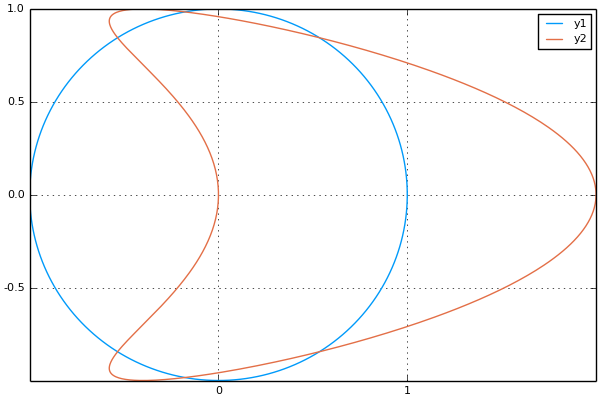

In [29]:
plot(CI1[1, :], CI1[2, :])
plot!(CI2[1, :], CI2[2,:])

In [80]:
in_or_out(G, t_rango, -1, 0.5)

false

In [81]:
t_rango

0.0:0.01:6.28

In [83]:
@time find_area(G, t_rango, -1:2, -1:1, 100000)

  6.396513 seconds (1.10 M allocations: 65.613 MB, 0.14% gc time)


3.1428

## Hénon con $a = 1.4 \ b = 1$  

In [85]:
CI2 = iterator(Henon, CI1, 1.4, 1, 1)
CI3 = iterator(Henon, CI2, 1.4, 1, 1)
CI4 = iterator(Henon, CI3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


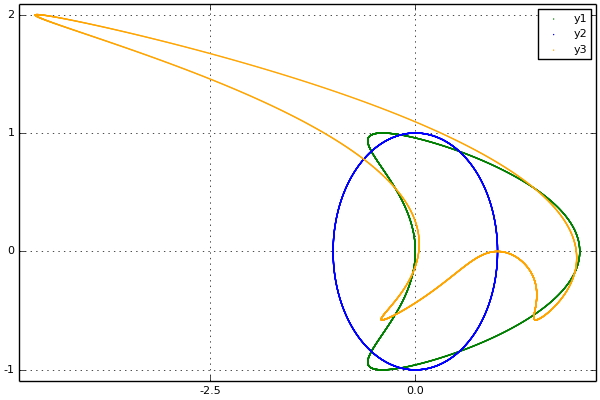

In [90]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange)
#scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

In [88]:
CI3_inv = iterator(Henon_inv, CI3, 1.4, 1, 1)
CI3_inv2 = iterator(Henon_inv, CI3_inv, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 1.0  1.0    0.999998  0.999996  0.999992    …   0.999999     1.0        
 0.0  0.001  0.002     0.003     0.00399999     -0.00118531  -0.000185307


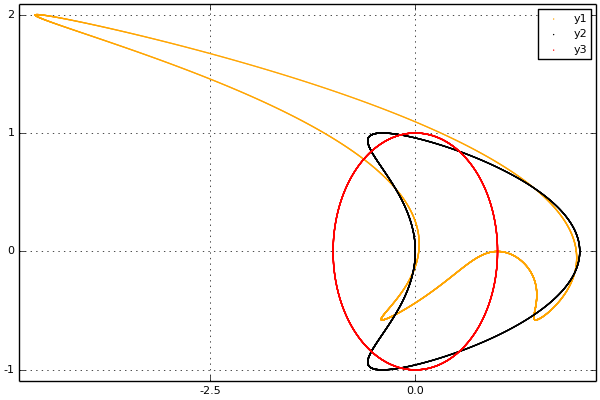

In [91]:
scatter(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange)
#scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3_inv[1,:], CI3_inv[2,:], markersize=(1), markercolor=:black)
scatter!(CI3_inv2[1,:], CI3_inv2[2,:], markersize=(1), markercolor=:red)

In [92]:
J(t) = (1 - 1.4*(1 -1.4 * cos(t)^2 + sin(t))^2 + cos(t), 1 -1.4 * cos(t)^2 + sin(t) )

J (generic function with 1 method)

In [93]:
CI3_param = condiones_iniciales_2D(J, t_rango)

2×629 Array{Float64,2}:
  1.776   1.78716   1.79823    1.80919   …   1.7499     1.76118    1.77243 
 -0.4    -0.38986  -0.379441  -0.368745     -0.422431  -0.412942  -0.403171


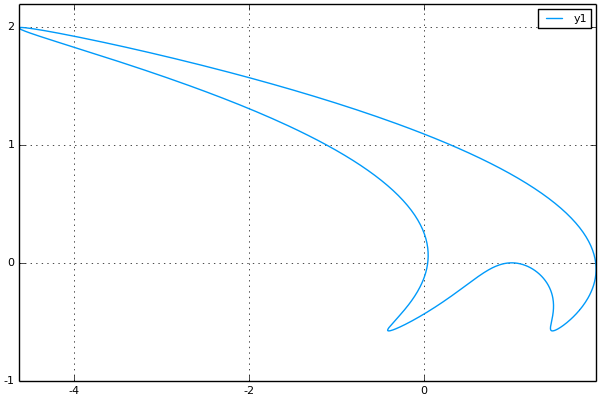

In [94]:
plot(CI3_param[1, :], CI3_param[2, :], ylims = (-1, 2.2))

In [98]:
@time find_area(J, t_rango, -5:2, -1:2.2, 1000000)

 96.663654 seconds (11.00 M allocations: 656.128 MB, 0.09% gc time)


3.138534

## Hénon con $a = 1.4 \ b = 0.3$  

In [116]:
CI2 = iterator(Henon, CI1, 1.4, 0.3, 1)
CI3 = iterator(Henon, CI2, 1.4, 0.3, 1)
CI4 = iterator(Henon, CI3, 1.4, 0.3, 1)
CI5 = iterator(Henon, CI4, 1.4, 0.3, 1)

2×629 Array{Float64,2}:
  0.554322   0.492308   0.427167  …   0.685627   0.631159   0.573403
 -0.222266  -0.231527  -0.240848     -0.20115   -0.210186  -0.219332


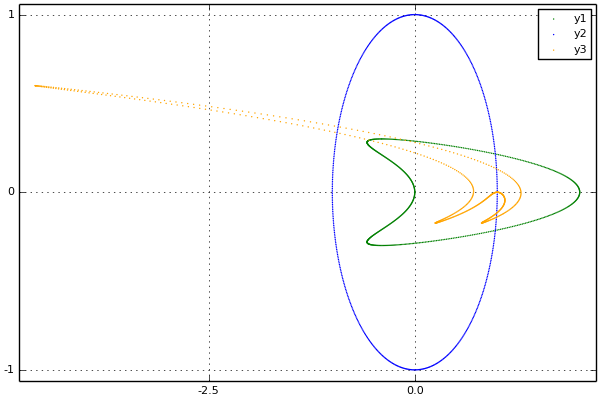

In [118]:
scatter(CI2[1,:], CI2[2,:], markersize=(1), markercolor=:green)
scatter!(CI1[1,:], CI1[2,:], markersize=(1), markercolor=:blue)
scatter!(CI3[1,:], CI3[2,:], markersize=(1), markercolor=:orange)

#scatter!(CI4[1,:], CI4[2,:], markersize=(1), markercolor=:red, leg=false)

In [99]:
K(t) = (1 - 1.4*cos(t)^2 + sin(t), 0.3*cos(t))

K (generic function with 1 method)

In [101]:
CK2 = condiones_iniciales_2D(K, t_rango)

2×629 Array{Float64,2}:
 -0.4  -0.38986   -0.379441  -0.368745  …  -0.422431  -0.412942  -0.403171
  0.3   0.299985   0.29994    0.299865      0.299919   0.299974   0.299998


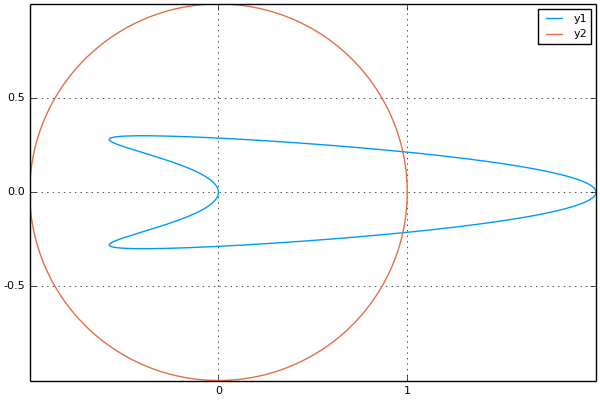

In [103]:
plot(CK2[1,:], CK2[2,:])
plot!(CI1[1,:], CI1[2,:])

In [105]:
find_area(σ, t_rango, -1:1, -1:2, 1000000)

3.145332

In [104]:
find_area(K, t_rango, -1:1, -1:2, 1000000)

0.659052

## Referencias 
 1. Finding Areas Using the Monte Carlo Method. http://commons.bcit.ca/math/entertainment/inout/index.html
 2. The Inside or Outside Problem. http://commons.bcit.ca/math/entertainment/inout/index.html 